## Plot the landscape under current conditions

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns


In [59]:
# open the file
df = pd.read_csv('resilience_landscape.csv').drop(['Unnamed: 0'], axis=1)

In [60]:
df

,Grassland Initial,Grassland End,Woodland Initial,Woodland End,Thorny Scrub Initial,Thorny Scrub End,Stocking Density,Run Number
0,88,100,6,0,6,0,1.0,1
1,28,15,37,74,35,10,0.0,2
2,21,100,34,0,46,0,1.0,3
3,8,100,45,0,27,0,0.5,4
4,10,100,30,0,60,0,5.0,5
...,...,...,...,...,...,...,...,...
96,48,100,35,0,17,0,5.0,97
97,43,100,36,0,21,0,2.0,98
98,30,100,46,0,24,0,0.5,99
99,33,100,26,0,41,0,0.5,100


In [64]:
df["Thorny Scrub End"].unique()

array([ 0, 10,  9,  1, 15, 18, 56,  8,  5,  2])

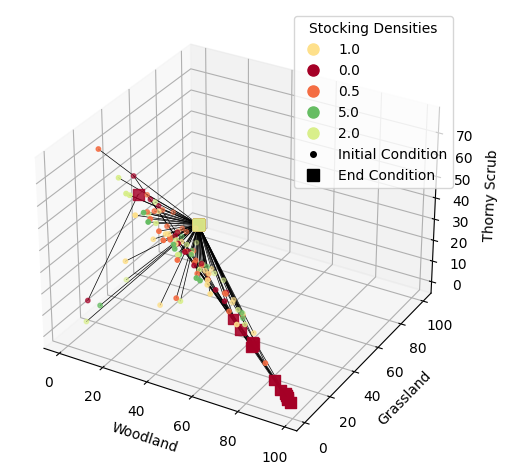

In [72]:
# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define colors based on stocking density
stocking_density_colors = plt.cm.get_cmap('RdYlGn', 6)  # 6 colors for 0-2 stocking density
stocking_density_color_mapping = {0: 0.0, 0.5: 0.2, 1: 0.4, 2: 0.6, 5: 0.8}

# Define marker shapes for initial and end conditions
initial_marker = 'o'
end_marker = 's'

# Scatter plot for initial conditions
initial_color = [stocking_density_colors(stocking_density_color_mapping[density]) for density in df['Stocking Density']]
initial_scatter = ax.scatter(df['Woodland Initial'], df['Grassland Initial'], df['Thorny Scrub Initial'], c=initial_color, marker=initial_marker, s=10)

# Scatter plot for end conditions
end_color = [stocking_density_colors(stocking_density_color_mapping[density]) for density in df['Stocking Density']]
end_scatter = ax.scatter(df['Woodland End'], df['Grassland End'], df['Thorny Scrub End'], c=end_color, marker=end_marker, s=60)


# Connect points with lines - plot the "true" run as red:
for i in range(len(df)):
    if df['Run Number'][i] == 1:  # Selecting run number 5
        ax.plot([df['Woodland Initial'][i], df['Woodland End'][i]],
                [df['Grassland Initial'][i], df['Grassland End'][i]],
                [df['Thorny Scrub Initial'][i], df['Thorny Scrub End'][i]], c='red', linewidth=0.5)
    else:
        ax.plot([df['Woodland Initial'][i], df['Woodland End'][i]],
                [df['Grassland Initial'][i], df['Grassland End'][i]],
                [df['Thorny Scrub Initial'][i], df['Thorny Scrub End'][i]], c='black', linewidth=0.5)

# Set labels
ax.set_xlabel('Woodland')
ax.set_ylabel('Grassland')
ax.set_zlabel('Thorny Scrub')

# Create custom legend
stocking_density_labels = sorted(df['Stocking Density'].unique())  # Sort the density labels
stocking_density_handles = []
for density in stocking_density_labels:
    stocking_density_handles.append(plt.Line2D([], [], color=stocking_density_colors(stocking_density_color_mapping[density]), marker='o', linestyle='None', markersize=8, label=str(density)))

# Add legend for initial and end conditions
legend_handles = stocking_density_handles + [plt.Line2D([], [], color='black', marker=initial_marker, linestyle='None', markersize=4, label='Initial Condition'),
                                             plt.Line2D([], [], color='black', marker=end_marker, linestyle='None', markersize=8, label='End Condition')]

ax.legend(handles=legend_handles, title='Stocking Densities')

plt.tight_layout()
# Show the plot
plt.show()

## Look at growth experiment

In [45]:
# now let's look at experiments
final_df = pd.read_csv('experiment_growth.csv').drop(['Unnamed: 0'], axis=1)

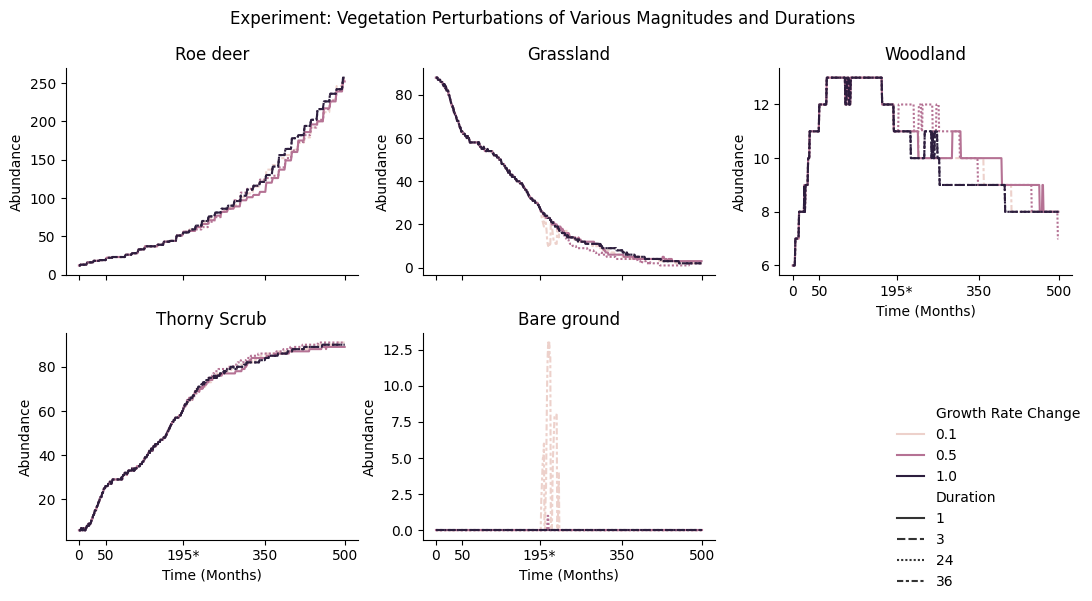

In [46]:
    f = sns.FacetGrid(final_df, col="Ecosystem Element", palette='Set1', col_wrap=3, sharey = False)
    # graph abundance
    f.map_dataframe(sns.lineplot, 'Time', 'Abundance', hue="Growth Rate Change", style="Duration")
    f.add_legend(loc='lower right')

    for ax in f.axes.flat:
        ax.set_ylabel('Abundance')
        ax.set_xlabel('Time (Months)')
        ax.set_xticks([0, 50, 195, 350, 500])
        ax.set_xticklabels([0, 50, "195*", 350, 500])   

    # add subplot titles
    axes = f.axes.flatten()
    # fill between the quantiles
    axes[0].set_title("Roe deer")
    axes[1].set_title("Grassland")
    axes[2].set_title("Woodland")
    axes[3].set_title("Thorny Scrub")
    axes[4].set_title("Bare ground")
        
    # add titles etc.
    f.fig.suptitle('Experiment: Vegetation Perturbations of Various Magnitudes and Durations')
    plt.tight_layout()
    # plt.savefig('forecasting_experiment.png')
    plt.show()

## Now graph tree experiment

In [47]:
final_df_trees = pd.read_csv('experiment_trees.csv').drop(['Unnamed: 0'], axis=1)

In [48]:
final_df_trees

,Abundance,Run Number,Time,Ecosystem Element,Tree Reduction
0,12,1,0,Roe deer,0.5
1,88,1,0,Grassland,0.5
2,6,1,0,Woodland,0.5
3,6,1,0,Thorny Scrub,0.5
4,0,1,0,Bare ground,0.5
...,...,...,...,...,...
12520,210,5,499,Roe deer,0.1
12521,2,5,499,Grassland,0.1
12522,0,5,499,Woodland,0.1
12523,98,5,499,Thorny Scrub,0.1


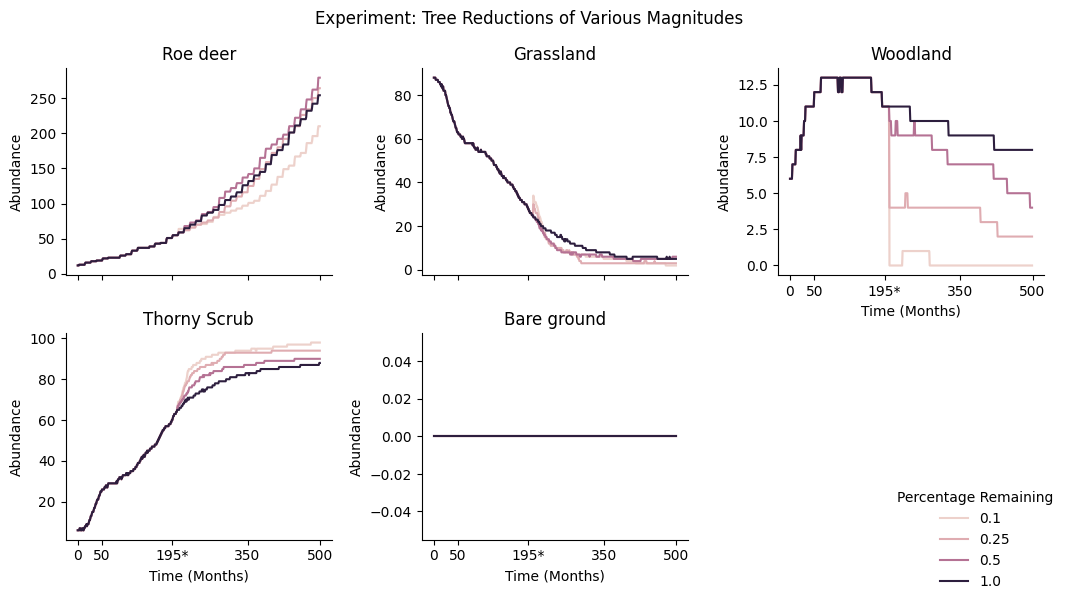

In [49]:
f = sns.FacetGrid(final_df_trees, col="Ecosystem Element", palette='Set1', col_wrap=3, sharey = False)
# graph abundance
f.map_dataframe(sns.lineplot, 'Time', 'Abundance', hue="Tree Reduction")
f.add_legend(loc='lower right', title='Percentage Remaining')

for ax in f.axes.flat:
    ax.set_ylabel('Abundance')
    ax.set_xlabel('Time (Months)')
    ax.set_xticks([0, 50, 195, 350, 500])
    ax.set_xticklabels([0, 50, "195*", 350, 500])   

# add subplot titles
axes = f.axes.flatten()
# fill between the quantiles
axes[0].set_title("Roe deer")
axes[1].set_title("Grassland")
axes[2].set_title("Woodland")
axes[3].set_title("Thorny Scrub")
axes[4].set_title("Bare ground")
    
# add titles etc.
f.fig.suptitle('Experiment: Tree Reductions of Various Magnitudes')
plt.tight_layout()
# plt.savefig('forecasting_experiment.png')
plt.show()